In [33]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

plt.rcParams["figure.figsize"] = [15, 10]

data = pd.read_csv('./data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)

['Dominican Republic' 'Belgium' 'United States' 'Uruguay' 'Germany'
 'Great Britain' 'Venezuela' 'Puerto Rico' 'Israel' 'Austria'
 'Switzerland' 'Jordan' 'Ethiopia' 'Spain' nan 'Japan' 'International'
 'Egypt' 'Paraguay' 'Soviet Union' 'Ireland' 'Argentina' 'Philippines'
 'China' 'West Bank and Gaza Strip' 'Multinational' 'Northern Ireland'
 'Brazil' 'Haiti' 'South Africa' 'Portugal' 'Colombia' 'Greece'
 'Nicaragua' 'Indonesia' 'Yugoslavia' 'Italy' 'Rhodesia' 'Ivory Coast'
 'Iran' 'Canada' 'Poland' 'Sweden' 'Turkey' 'Costa Rica' 'Russia' 'Iraq'
 'Cuba' 'France' 'Malawi' 'Democratic Republic of the Congo' 'Netherlands'
 'Chile' 'Hong Kong' 'Yemen' 'Mexico' 'Syria' 'India' 'New Zealand'
 'Senegal' 'Algeria' 'Peru' 'Czechoslovakia' 'Saudi Arabia' 'Denmark'
 'West Germany (FRG)' 'Bahamas' 'Bolivia' 'El Salvador' 'Botswana'
 'Guatemala' 'Lebanon' 'North Korea' 'Albania' 'South Korea'
 'United Kingdom' 'Pakistan' 'Kenya' 'Cyprus' 'Panama' 'Sri Lanka'
 'Ecuador' 'Malaysia' 'Morocco' 'Somalia'

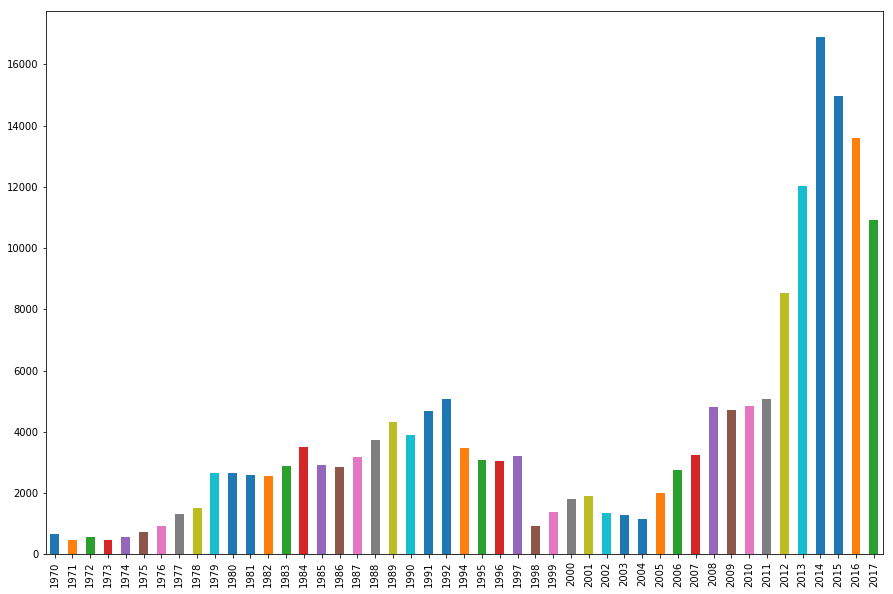

In [23]:
#Ilość zamachów w roku na całym świecie
data['iyear'].value_counts().sort_index().plot(kind='bar')

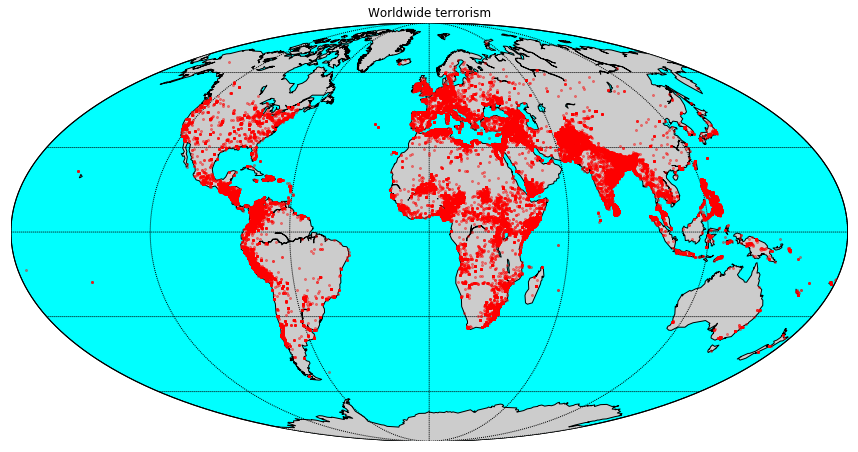

In [45]:
#Tereny, na których miał miejsce zamach terrorystyczny w latach 1970-2017
#lats = data['latitude'].to_list()
#lons = data['longitude'].to_list()

m = Basemap(projection='moll',resolution='c', lon_0=0)

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
x,y=m(lons,lats)
m.plot(x, y, 'go', markersize=2, color = 'r',alpha=0.4)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Worldwide terrorism")
plt.show()

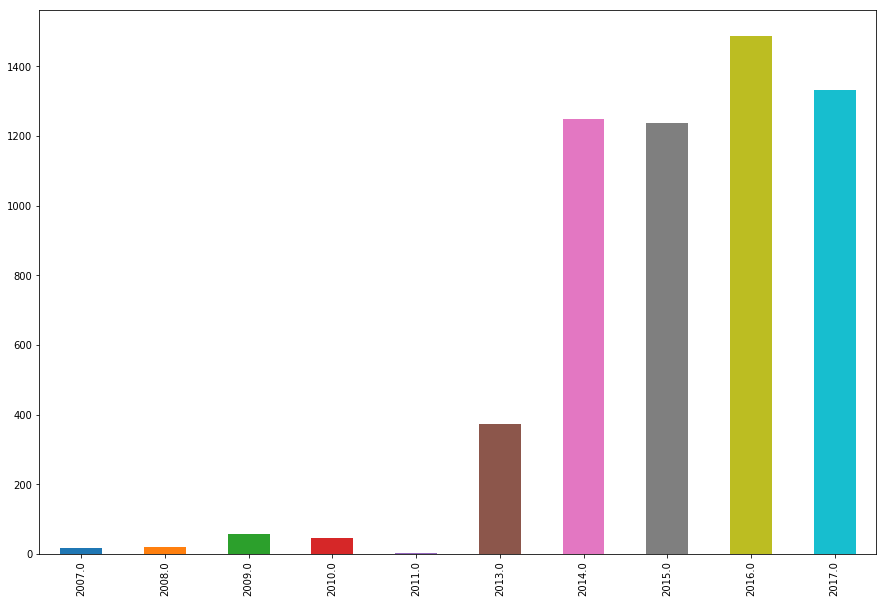

In [19]:
#Zamachy w Europie wykonane przez Islamic State w danym roku
IS_idx = data.gname.str.startswith('Islamic State')
IS = data.where(IS_idx==True)
IS = IS.dropna(how='all')
IS_EU_idx = IS.region_txt.str.contains('europe')
IS_EU = IS.where(IS_EU_idx==True)
IS_EU = IS.dropna(how='all')
p = IS_EU['iyear'].value_counts().sort_index().plot(kind='bar')

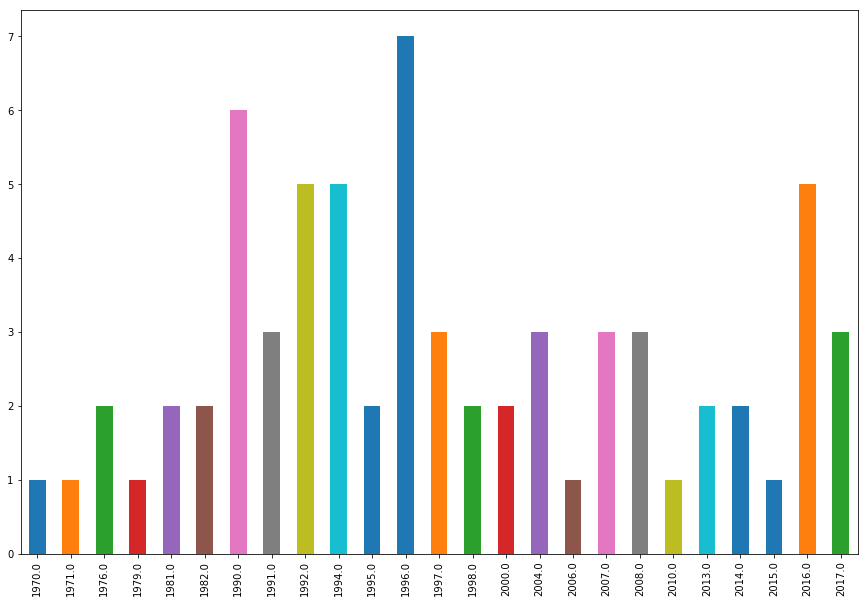

In [39]:
#Ilość Polaków zaatakowanych przez terrorystów
Poland_idx = data.natlty1_txt.str.contains('Poland')
Poland = data.where(Poland_idx==True)
Poland = Poland.dropna(how='all')
Poland['iyear'].value_counts().sort_index().plot(kind='bar')

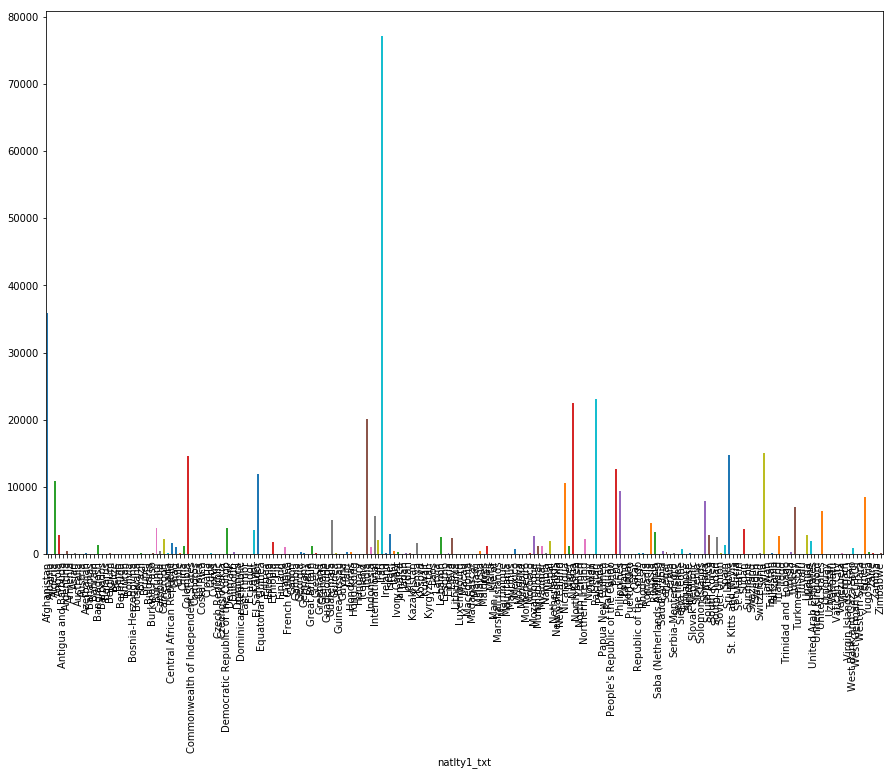

In [38]:
nat_kills = data.groupby('natlty1_txt')['nkill'].sum()

kills_mean = data.groupby('natlty1_txt')['nkill'].sum().plot(kind='bar')

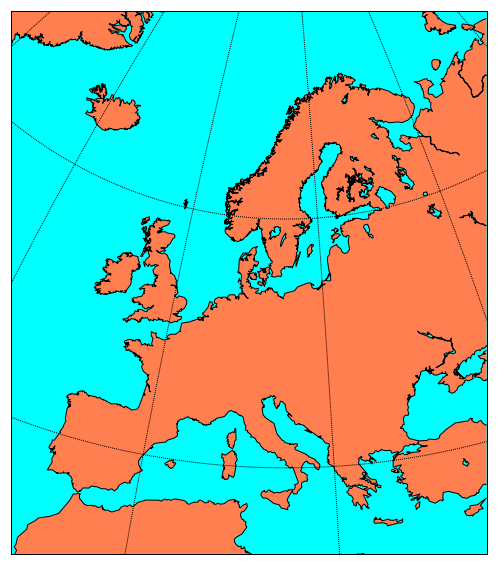

In [47]:
m2 = Basemap(llcrnrlon=-10.,llcrnrlat=30,urcrnrlon=65.,urcrnrlat=70.,\
            resolution='l',projection='stere',\
            lat_ts=50,lat_0=50,lon_0=15.)
m2.drawcoastlines()
m2.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m2.drawparallels(np.arange(-80.,81.,20.))
m2.drawmeridians(np.arange(-180.,181.,20.))
m2.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(20,10)